In [51]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

In [2]:
from algos import reconstruct, reconstruct_1bit
from utils import sign, img_show_unit_ball

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera() / 255.0

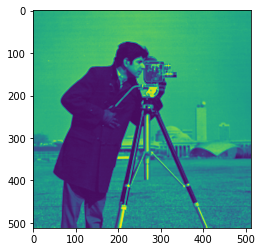

In [38]:
plt.imshow(original)

In [5]:
coeffs2 = pywt.dwt2(original, 'db10')
LL, (LH, HL, HH) = coeffs2
x_0 = np.zeros((265 * 2, 265 * 2))
x_0[:265, :265] = LL
x_0[:265, 265:] = LH
x_0[265:, :265] = HL
x_0[:265, :265] = HH

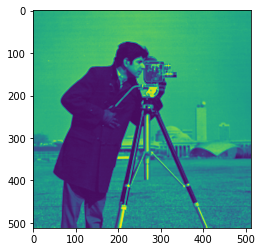

In [39]:
plt.imshow(pywt.idwt2((LL, (LH, HL, HH)), 'db10'))

In [40]:
# Parameters
n = LL.ravel().shape[0]
m = 200

In [41]:
# Generate sensing matrix
A = np.random.randn(m, n)

In [43]:
# Compute y
y = sign(A.dot(LL.ravel()))

In [44]:
xx = reconstruct_1bit(y, A, verbose=True)

Calling solver.

ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +1.762e-27  +3.863e+00  +8e+05  1e+00  2e+00  1e+00  6e+00    ---    ---    1  1  - |  -  - 
 1  +5.031e+01  +5.657e+01  +7e+05  8e-01  1e+00  4e+00  5e+00  0.5504  7e-01   1  1  1 |  0  0
 2  -3.193e+00  +1.616e+00  +2e+05  4e-01  1e-01  5e+00  1e+00  0.9890  2e-01   1  2  1 |  0  0
 3  -1.075e-01  +7.091e-02  +4e+03  3e-02  3e-03  2e-01  3e-02  0.9782  2e-03   1  1  1 |  0  0
 4  +5.795e-02  +1.052e-01  +1e+03  2e-02  7e-04  5e-02  7e-03  0.7347  8e-03   1  0  1 |  0  0
 5  +2.291e+00  +2.324e+00  +1e+03  1e-02  6e-04  3e-02  7e-03  0.3074  8e-01   0  1  1 |  0  0
 6  +3.106e+00  +3.126e+00  +6e+02  1e-02  4e-04  2e-02  4e-03  0.4092  3e-02   1  0  1 |  0  0
 7  +2.917e+00  +2.937e+00  +6e+02  1e-02  4e-04  2e-02  4e-03  0.0067  1e+00   1  1  1 |  0  0
 8  +3.090e+00  +3.109e+00  +6

In [18]:
xx.max()

0.5137237901311351

In [11]:
xx_ = xx.reshape((2 * 265, 2 * 265)) / np.linalg.norm(xx) * np.linalg.norm(x_0)
LL_i = xx_[:265, :265]
LH_i = xx_[:265, 265:]
HL_i = xx_[265:, :265]
HH_i = xx_[:265, :265]

In [92]:
x_re = pywt.idwt2((None, (LH, HL, HH)), 'db10')

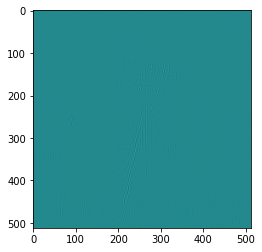

In [93]:
plt.imshow(x_re)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 2., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.02046951, -0.81842256, -0.61637561, -0.41432866, -0.21228171,
        -0.01023476,  0.19181219,  0.39385915,  0.5959061 ,  0.79795305,
         1.        ]),
 <a list of 265 BarContainer objects>)

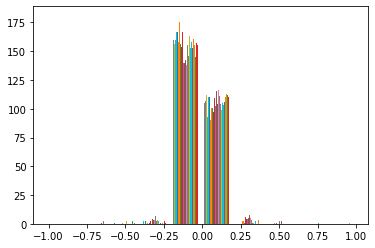

In [90]:
plt.hist(LH / np.max(LH))